# Essential Math for Data Science

## 9. Appendix A. Supplemental Topics

### Using LaTeX Rendering with SymPy

In [1]:
from sympy import *

x, y = symbols('x y')

z = x**2 / sqrt(2 * y**3 - 1)

print(latex(z))

\frac{x^{2}}{\sqrt{2 y^{3} - 1}}


In [2]:
import webbrowser
from sympy import *

x, y = symbols('x y')

z = x**2 / sqrt(2*y**3 - 1)

webbrowser.open('https://latex.codecogs.com/png.image?\dpi{200}' + latex(z))

True

### Binomial Distribution from Scratch

In [6]:
# Factorials multiply consecutive descending integers down to 1
# Example: 5! = 5 * 4 * 3 * 2 * 1
def factorial(n: int):
    f = 1
    for i in range(n):
        f *= (i + 1)
    return f

# Generates the coefficient needed for the binomial distribution
def binomial_coefficient(n: int, k: int):
    return factorial(n) / (factorial(k) * factorial(n - k))
    
# Binomial distribution calculates the probability of  events out of n trials
# given the p probability of k occurring
def binomial_distribution(k: int, n: int, p: float):
    return binomial_coefficient(n, k) * (p ** k) * (1.0 - p) ** (n - k)

# 10 trials where each has 90% success probability
n = 10
p = 0.9

for k in range(n + 1):
    probability = binomial_distribution(k, n, p)
    print(f'{k} - {probability}')

0 - 9.999999999999978e-11
1 - 8.999999999999981e-09
2 - 3.644999999999994e-07
3 - 8.747999999999988e-06
4 - 0.00013778099999999982
5 - 0.0014880347999999984
6 - 0.01116026099999999
7 - 0.057395627999999976
8 - 0.19371024449999993
9 - 0.38742048900000003
10 - 0.3486784401000001


### Beta Distribution from Scratch

In [7]:
# Factorials multiply consecutive descending integers down to 1
# Example: 5! = 5 * 4 * 3 * 2 * 1
def factorial(n: int):
    f = 1
    for i in range(n):
        f *= (i + 1)
    return f

def approximate_integral(a, b, n, f):
    delta_x = (b - a) / n
    total_sum = 0
    
    for i in range(1, n + 1):
        midpoint = 0.5 * (2 * a + delta_x * (2 * i - 1))
        total_sum += f(midpoint)
        
    return total_sum * delta_x

def beta_distribution(x: float, alpha: float, beta: float) -> float:
    if x < 0.0 or x > 1.0:
        raise ValueError('x must be between 0.0 and 1.0')
    
    numerator = x ** (alpha - 1.0) * (1.0 - x) ** (beta - 1.0)
    denominator = (1.0 * factorial(alpha - 1) * factorial(beta - 1)) / \
                  (1.0 * factorial(alpha + beta - 1))
    
    return numerator / denominator

greater_than_90 = approximate_integral(a = 0.90, b = 1.0, n = 1000,
                                       f = lambda x: beta_distribution(x, 8, 2))
less_than_90 = 1.0 - greater_than_90

print(f'Greater than 90%: {greater_than_90}, less than 90%: {less_than_90}')

Greater than 90%: 0.22515904881135335, less than 90%: 0.7748409511886467


### CDF and Inverse CDF from Scratch

In [13]:
import math

def normal_pdf(x: float, mean: float, std_dev: float) -> float:
    return (1.0 / (2.0 * math.pi * std_dev ** 2) ** 0.5) * \
           math.exp(-1.0 * ((x - mean) ** 2 / (2.0 * std_dev ** 2)))

def approximate_integral(a, b, n, f):
    delta_x = (b - a) / n
    total_sum = 0
    
    for i in range(1, n + 1):
        midpoint = 0.5 * (2 * a + delta_x * (2 * i - 1))
        total_sum += f(midpoint)
        
    return total_sum * delta_x

p_between_61_and_62 = approximate_integral(
    a = 61, b = 62, n = 7, f = lambda x: normal_pdf(x, 64.43, 2.99))

print(f'{round(p_between_61_and_62*100, 2)}% probability '
      f'a golden retriever weights between 61 and 62 pounds')

8.25% probability a golden retriever weights between 61 and 62 pounds


In [18]:
import math

def normal_cdf(x: float, mean: float, std_dev: float) -> float:
    return (1 + math.erf((x - mean) / math.sqrt(2) / std_dev)) / 2
            
mean = 64.43
std_dev = 2.99

x = normal_cdf(66, mean, std_dev) - normal_cdf(62, mean, std_dev)

print(x)

0.49204501470628936


In [19]:
import random
from scipy.special import erfinv

def inv_normal_cdf(p: float, mean: float, std_dev: float):
    return mean + (std_dev * (2.0 ** 0.5) *  erfinv((2.0 * p) - 1.0))

mean = 64.43
std_dev = 2.99

for i in range(0, 1000):
    random_p = random.uniform(0.0, 1.0)
    print(inv_normal_cdf(random_p, mean, std_dev))

60.312748295532714
60.989757097687345
64.35207597546516
61.44055313737032
69.23726503833072
62.43431892687182
66.82828774780062
66.49590027797228
66.01217788390584
68.98095541204023
62.238384961743726
65.30583683528432
61.32070047203681
60.75956761597526
68.0823535441329
60.10369329750475
62.31866217298421
64.11548841497878
58.39079927610946
64.77434485190508
66.68122039106638
62.77663944824157
64.43137918350612
65.35521620080354
66.45078714844414
66.00994297355624
62.71134184107537
64.95216932910486
63.08555882080146
66.70834580550294
56.08976696512326
61.98659974765705
70.37290180883777
63.17545837185909
62.185731022914446
66.70270627572602
64.66688335727673
65.25732496328976
63.05457527170368
64.32021219272215
68.31647852605147
62.34841959038204
61.08410822761289
63.09655596076365
62.48575210444814
60.783863775746646
63.54384798556068
69.97699918197664
64.88651744413173
59.990636079440506
67.07732726333168
61.582880116379386
63.98437379096359
62.87708119949393
60.647892755401735
59.

### Use e to Predict Event Probability Over Time

In [27]:
from math import exp

# Probability of leak in one year
p_leak = 0.05

# Number of years
t = 5

# Probability of leak within five years
p_leak_5_years = 1.0 - exp(-p_leak * t)

print(f'Probability of leak within 5 years {round(p_leak_5_years*100, 1)}%.')

Probability of leak within 5 years 22.1%.


### Hill Climbing and Linear Regression

In [28]:
from numpy.random import normal
import pandas as pd

points = [p for p in pd.read_csv('https://bit.ly/2KF29Bd').itertuples()]

# Building the model
m = 0.0
b = 0.0

# Number of iterations to perform
iterations = 150_000

# Number of points
n = float(len(points))

# Initialize with a really large loss that we know will get replaced
best_loss = 10_000_000_000_000.0

for i in range(iterations):
    # Randomly adjust 'm' and 'b'
    m_adjust = normal(0, 1)
    b_adjust = normal(0, 1)
    
    m += m_adjust
    b += b_adjust
    
    # Calculate loss, which is total sum squared error
    new_loss = 0.0
    for p in points:
        new_loss += (p.y - (m * p.x + b)) ** 2
        
    # If loss has improved, keep new values. Otherwise revert.
    if new_loss < best_loss:
        print(f'y = {m}x + {b}')
        best_loss = new_loss
        
    else:
        m -= m_adjust
        b -= b_adjust
        
print(f'y = {m}x + {b}')

y = 0.4931950573697177x + 0.8971267339046598
y = 1.4755111461095463x + 1.4752409713545491
y = 2.4732183701532646x + 2.915744667380718
y = 2.490903929601534x + 2.5984083584209094
y = 2.1872205680879886x + 1.962236581962377
y = 2.4411303792398273x + 2.371292423202405
y = 2.220387080300971x + 3.5583894746038887
y = 1.7147271075332344x + 5.499384975540606
y = 1.937179377585255x + 5.010062705254455
y = 1.910459897923085x + 5.097816041063652
y = 2.004090959927542x + 4.385711391080823
y = 1.9193092594802648x + 4.832080427041754
y = 1.9336669648526288x + 4.788156066317548
y = 1.9315993781055334x + 4.7674425400649145
y = 1.9421687195531239x + 4.728459347725262
y = 1.9434053425602842x + 4.716413736688932
y = 1.9437191220786856x + 4.710931264784575
y = 1.937830147460372x + 4.748082550944128
y = 1.9378301474603303x + 4.748082550944126


### Hill Climbing and Logistic Regression

In [30]:
import math
import random
import numpy as np
import pandas as pd

# Desmos graph: https://www.desmos.com/calculator/6cb10atg3l

points = [p for p in pd.read_csv('https://tinyurl.com/y2cocoo7').itertuples()]

best_likelihood = -10_000_000
b0 = 0.01
b1 = 0.01

# Calculate maximum likelihood

def predict_probability(x):
    p = 1.0 / (1.0001 + math.exp(-(b0 + b1 * x)))
    return p

for i in range(1_000_000):
    # Select b0 or b1 randomly and adjust it randomly
    random_b = random.choice(range(2))
    
    random_adjust = np.random.normal()
    
    if random_b == 0:
        b0 += random_adjust
    elif random_b == 1:
        b1 += random_adjust
        
    # Calculate total likelihood
    true_estimates = sum(math.log(predict_probability(p.x)) \
                         for p in points if p.y == 1.0)
    false_estimates = sum(math.log(1.0 - predict_probability(p.x)) \
                          for p in points if p.y == 0.0)
    
    total_likelihood = true_estimates + false_estimates
    
    # If likelihood improves, keep the random adjustment. Otherwise revert.
    if best_likelihood < total_likelihood:
        best_likelihood = total_likelihood
    elif random_b == 0:
        b0 -= random_adjust
    elif random_b == 1:
        b1 -= random_adjust
            
print(f'1.0 / (1 + exp(-({b0} + {b1}*x))')
print(f'Best likelihood: {math.exp(best_likelihood)}')

1.0 / (1 + exp(-(-3.1754695042812737 + 0.69263768822253*x))
Best likelihood: 4.790310821861631e-05


### A Brief Intro to Linear Programming

In [39]:
pip install -U git+https://github.com/coin-or/pulp

  Cloning https://github.com/coin-or/pulp to c:\users\vanli\appdata\local\temp\pip-req-build-t5lz8eh9
  Resolved https://github.com/coin-or/pulp to commit 858304d3439bbdd46a42a8be3d0c56ab407022c9
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/coin-or/pulp 'C:\Users\vanli\AppData\Local\Temp\pip-req-build-t5lz8eh9'


In [38]:
pip install pulp

In [41]:
# Graph: https://www.desmos.com/calculator/iildqi2vt7
from pulp import *

# Declare your variables
x = LpVariable('x', 0, cat = LpInteger)   # 0 <= x
y = LpVariable('y', 0, cat = LpInteger)   # 0 <= y

# Defines the problem
prob = LpProblem('factory_problem', LpMaximize)

# Defines the constraints
prob += x + 3*y <= 20
prob += 6*x + 2*y <= 45

# Defines the objective function to maximize
prob += 200*x + 300*y

# Solve the problem
status = prob.solve()
print(LpStatus[status])

# Print the results
print(value(x))
print(value(y))

Optimal
5.0
5.0


### MNIST Classifier Using scikit-learn

      class
       size
class      
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958
Training set score: 0.9999786780383795
Test set score: 0.9766233766233766


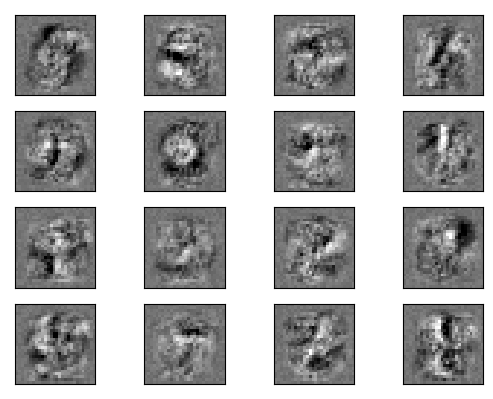

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://bit.ly/3ilJc2C', compression = 'zip', delimiter = ',')

X = (df.values[:, :-1] / 255)
Y = df.values[:, -1]

# Get a count of each group to ensure samples are equitably balanced
print(df.groupby(['class']).agg({'class': [np.size]}))

# Separate training and testing data
# Note that the 'stratify' parameter is used to ensure each class
# is proportionally represented in both sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.33, random_state = 10, stratify = Y)

nn = MLPClassifier(
    solver = 'sgd',
    hidden_layer_sizes = (100, ),
    activation = 'logistic',
    max_iter = 480,
    learning_rate_init = 0.1)

nn.fit(X_train, Y_train)

print(f'Training set score: {nn.score(X_train, Y_train)}')
print(f'Test set score: {nn.score(X_test, Y_test)}')

# Display heat map
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4)

# Use global min / max to ensure all weights are show on the same scale
vmin, vmax = nn.coefs_[0].min(), nn.coefs_[0].max()
for coef, ax in zip(nn.coefs_[0].T, axes.ravel()):
    ax.matshow(
        coef.reshape(28, 28), cmap = plt.cm.gray, vmin = 0.5 * vmin, vmax = 0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()